# This notebook is prepared by ApplAi's Technical And Training Depratment.
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


###

### Task 1: Importing libraries and Exploring the Dataset.

In [177]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project

In [178]:
data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [179]:
data.shape

(303, 14)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [181]:
list_of_numeric = ["age", "trestbps","chol","thalach","oldpeak","target"]
list_of_categorical = ["sex", "cp","fbs","restecg","exang","slope","ca","thal","target"]


### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [182]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

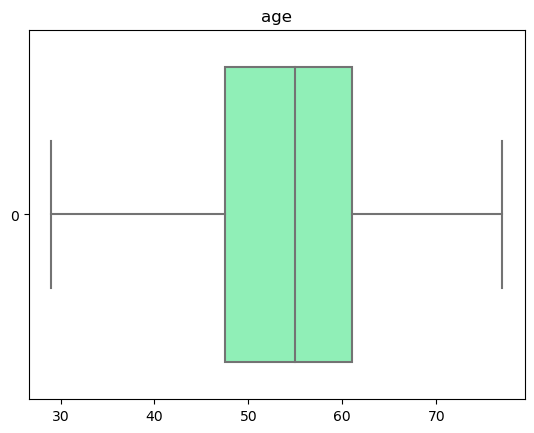

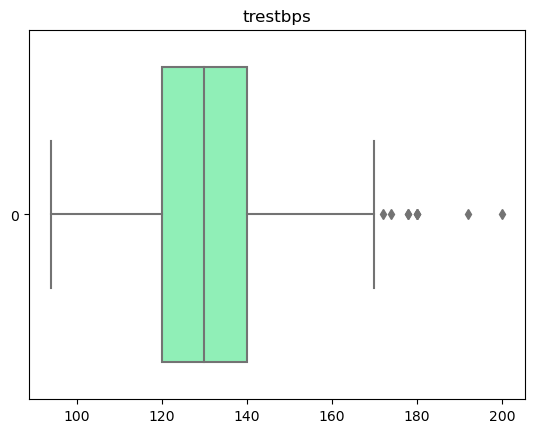

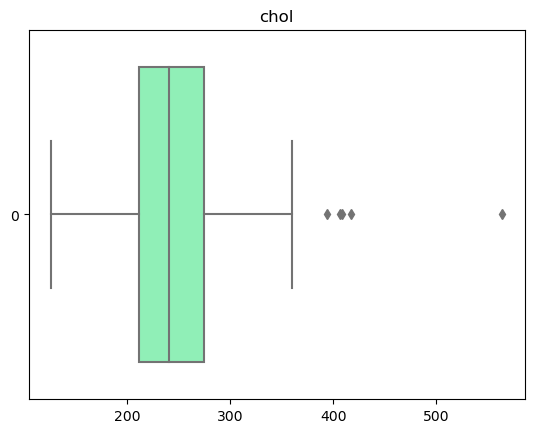

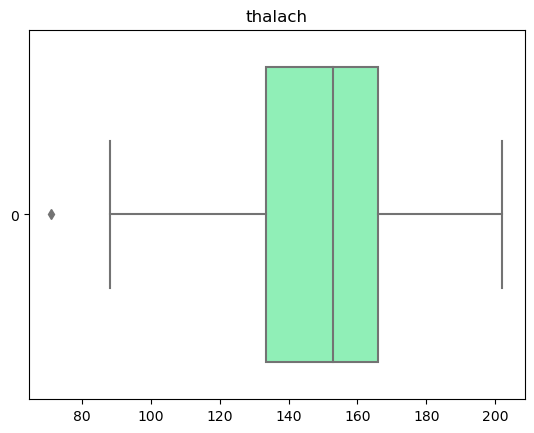

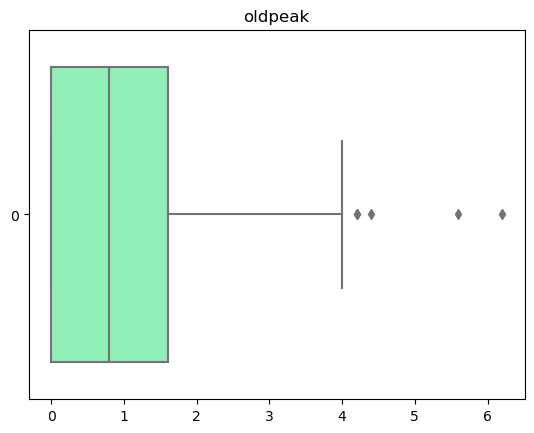

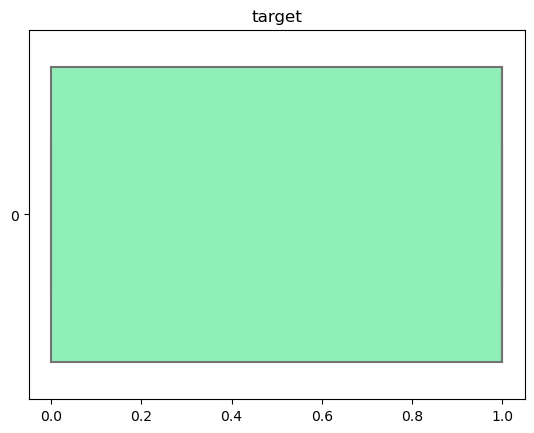

In [183]:
df_numeric = data.loc[:, list_of_numeric]
for i in list_of_numeric:
    plt.figure()
    sns.boxplot(data=data[i],palette='rainbow',orient='h')
    plt.title(i)

In [184]:
# Create a copy of the DataFrame to avoid modifying the original data
df = data.copy()
daf = data.copy()

In [185]:
for i in list_of_numeric:
    # Calculate IQR
    Q1 = np.percentile(df.loc[:, i], 25)
    Q3 = np.percentile(df.loc[:, i], 75)
    IQR = Q3 - Q1
    
    print("Old shape for column '{}': {}".format(i, df.loc[:, i].shape))
    
    # Calculate upper and lower bounds
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    
    print("Upper bound: {}, Lower bound: {}".format(upper, lower))
    
    # Filter the DataFrame to exclude values outside the IQR range
    df = df[(df.loc[:, i] >= lower) & (df.loc[:, i] <= upper)]
    
    print("New shape for column '{}': {}".format(i, df.loc[:, i].shape))
    
print("Final shape of DataFrame:", df.shape)



Old shape for column 'age': (303,)
Upper bound: 81.25, Lower bound: 27.25
New shape for column 'age': (303,)
Old shape for column 'trestbps': (303,)
Upper bound: 170.0, Lower bound: 90.0
New shape for column 'trestbps': (294,)
Old shape for column 'chol': (294,)
Upper bound: 367.875, Lower bound: 116.875
New shape for column 'chol': (289,)
Old shape for column 'thalach': (289,)
Upper bound: 222.0, Lower bound: 78.0
New shape for column 'thalach': (288,)
Old shape for column 'oldpeak': (288,)
Upper bound: 4.0, Lower bound: -2.4000000000000004
New shape for column 'oldpeak': (284,)
Old shape for column 'target': (284,)
Upper bound: 2.5, Lower bound: -1.5
New shape for column 'target': (284,)
Final shape of DataFrame: (284, 14)


In [186]:
daf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trestbps  284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    int64  
 6   restecg   284 non-null    int64  
 7   thalach   284 non-null    int64  
 8   exang     284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slope     284 non-null    int64  
 11  ca        284 non-null    int64  
 12  thal      284 non-null    int64  
 13  target    284 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


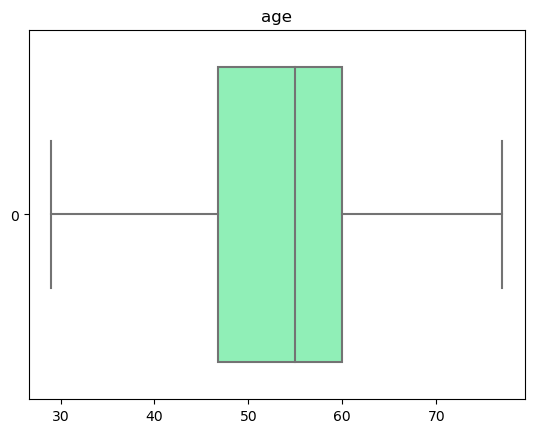

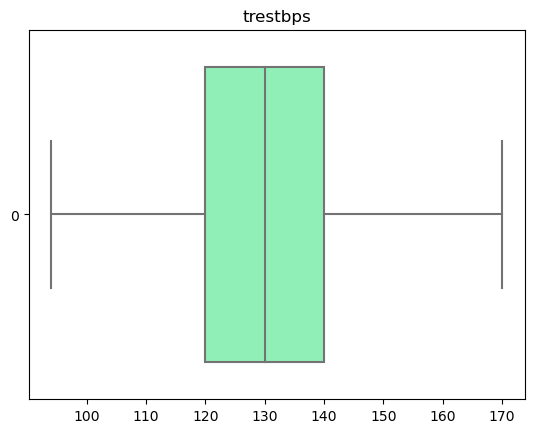

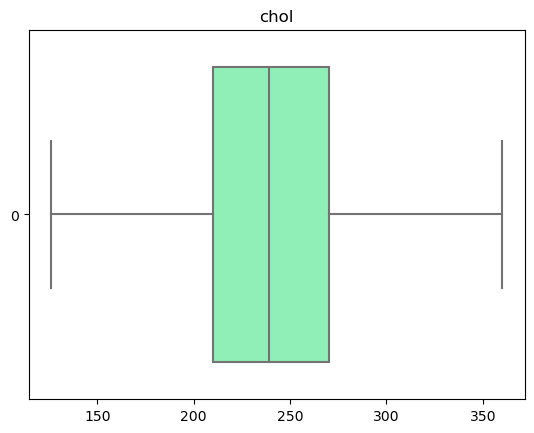

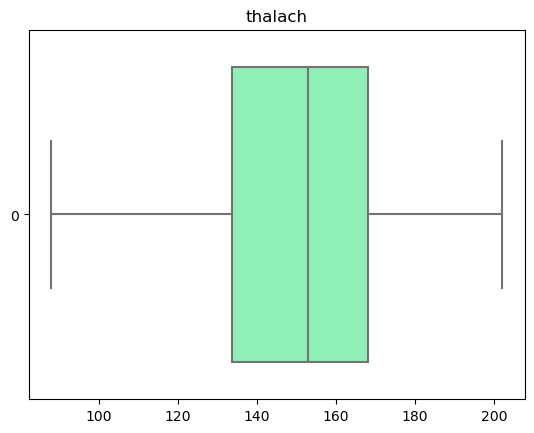

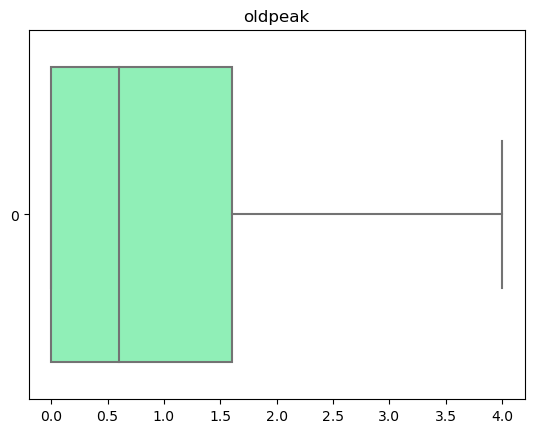

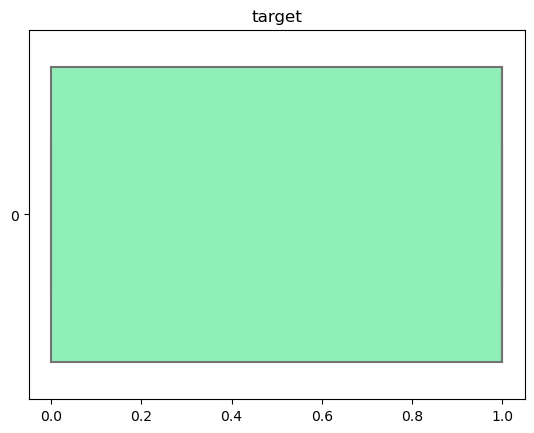

In [188]:
df_numeric = df.loc[:, list_of_numeric]
for i in list_of_numeric:
    plt.figure()
    sns.boxplot(data=df[i],palette='rainbow',orient='h')
    plt.title(i)

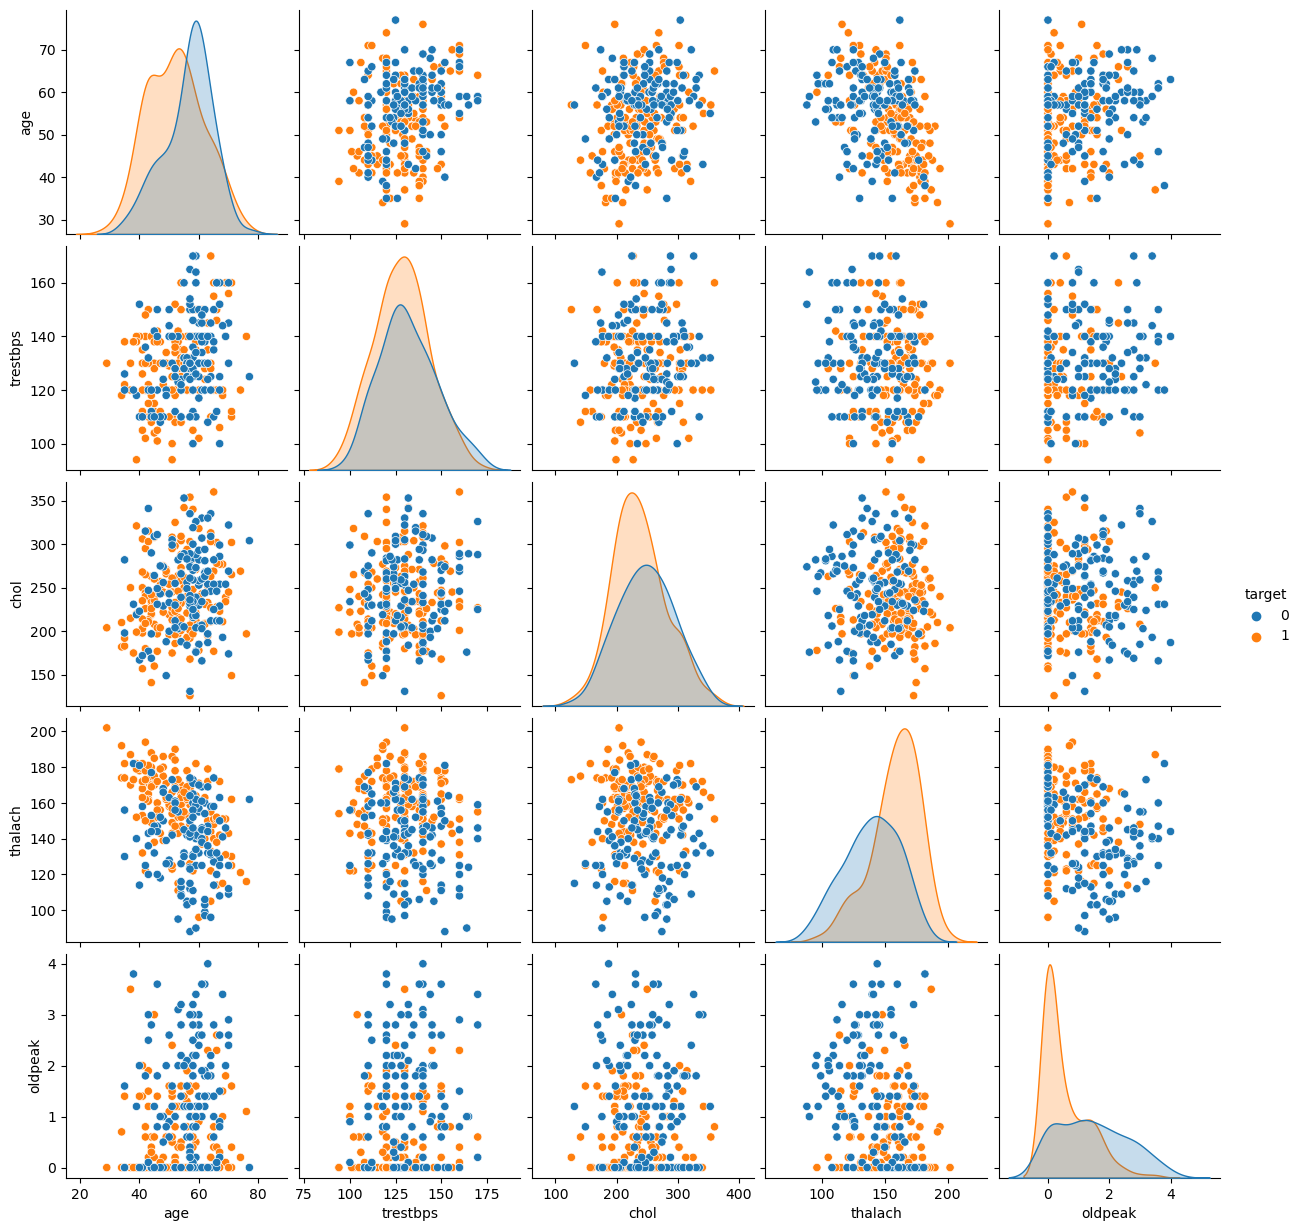

In [189]:
# Checking the overall data Shape
df_numeric = df.loc[:, list_of_numeric]
sns.pairplot(df_numeric, hue = "target", diag_kind = "kde")

### Task 4: creat a model that fits the data

In [190]:
dataset = df.copy()

In [191]:
dataset = pd.get_dummies(dataset, columns = list_of_categorical[:-1], drop_first = True)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [192]:
X = dataset.drop(["target"], axis = 1)
y = dataset[["target"]]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [194]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\abood\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [195]:
y_pred = classifier.predict(X_test)

### Task 5: creating an accurecy table

In [196]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       0.81      0.94      0.87        36

    accuracy                           0.86        71
   macro avg       0.87      0.86      0.86        71
weighted avg       0.87      0.86      0.86        71



In [197]:
accuracy=accuracy_score(y_test, y_pred)


In [198]:
accuracy

0.8591549295774648

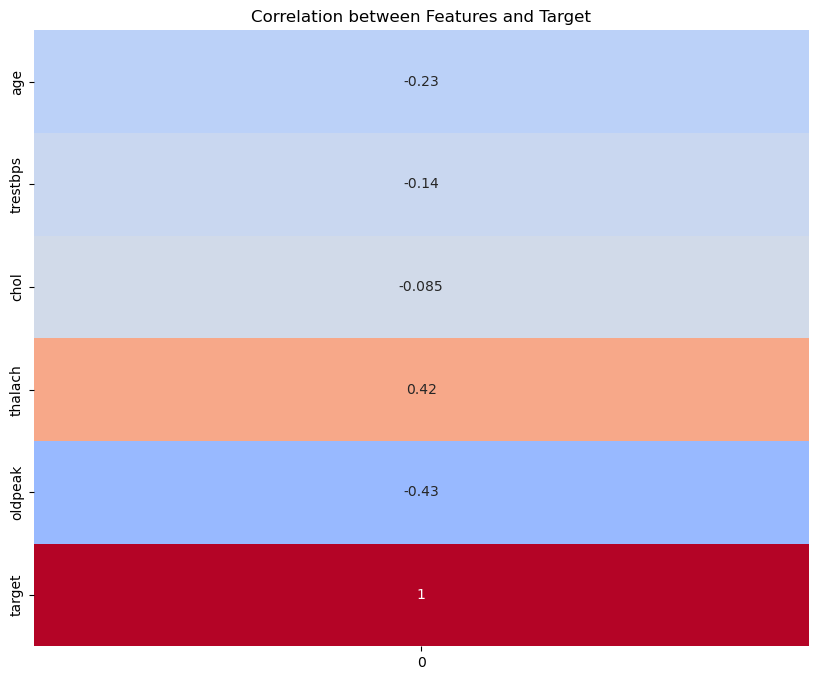

In [199]:
# Calculate the correlation matrix
# Create a DataFrame with selected numeric columns
numeric_data = data[list_of_numeric]

correlation_matrix = numeric_data.corrwith(numeric_data["target"])

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', center=0, cbar=False)
plt.title('Correlation between Features and Target')
plt.show()

**************After we applied the relationship between the features, we noticed that (((thalach))) plays a vital role  in determining the health condition of people’s hearts

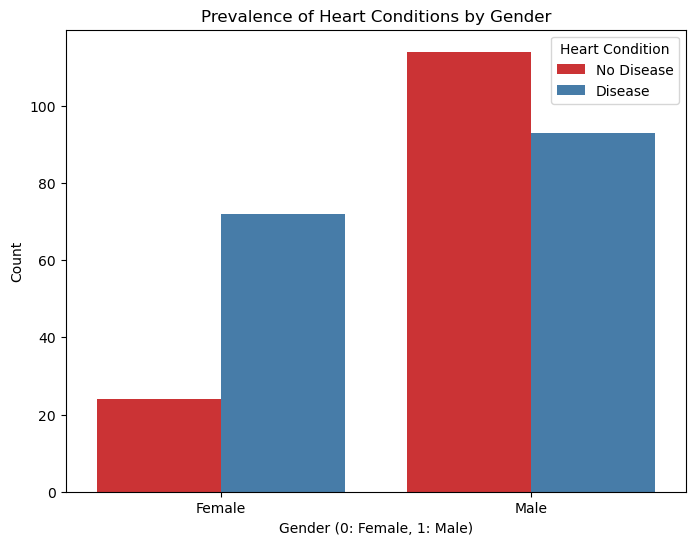

In [200]:
# Create a countplot to compare the prevalence of heart conditions between males and females
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="sex", hue="target", palette="Set1")
plt.title("Prevalence of Heart Conditions by Gender")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Female", "Male"])
plt.legend(title="Heart Condition", labels=["No Disease", "Disease"])
plt.show()

In [201]:
# Define the threshold age for younger people
threshold_age = 40

# Initialize counters
total_younger_people = 0
younger_people_with_disease = 0

# Iterate through rows to calculate counts
for index, row in data.iterrows():
    if row["age"] < threshold_age:
        total_younger_people += 1
        if row["target"] == 1:
            younger_people_with_disease += 1

# Calculate the percentage of younger people with heart disease
percentage_with_disease = (younger_people_with_disease / total_younger_people) * 100

print("Percentage of younger people with heart disease: {:.2f}%".format(percentage_with_disease))








Percentage of younger people with heart disease: 75.00%


# conclusion:
*********************
*********************After studying the project and applying the machine learning... it was found that (((men))) are  more prone to heart diseases**************
    